<Figure size 1200x600 with 0 Axes>

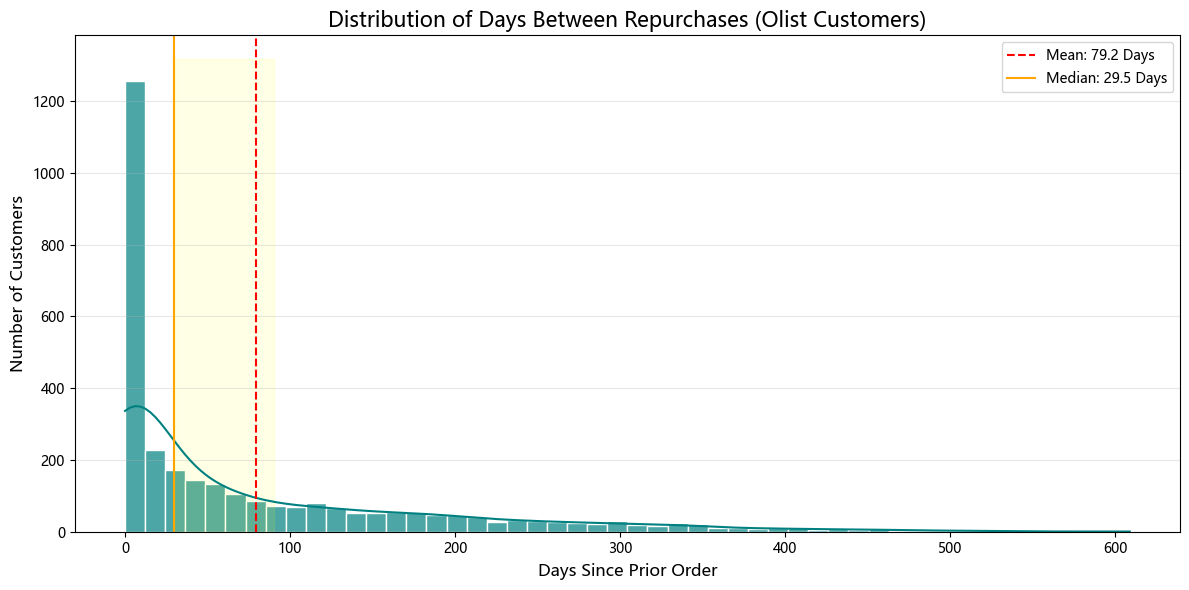

分析结论：用户的平均复购周期为 79.2 天，中位数为 29.5 天。


In [3]:
from config import * # Import all configurations
%matplotlib inline


#1.取数据
with open('../sql_scripts/08_customer_repurchase_interval.sql', 'r') as f:
    query = f.read()
df = pd.read_sql(query, conn)

# 2. 计算核心指标
mean_days = df['days_since_prior_order'].mean()
median_days = df['days_since_prior_order'].median()

# 3. 可视化绘制
plt.figure(figsize=(12, 6))

# 绘制分布直方图和核密度曲线
sns.histplot(df['days_since_prior_order'], bins=50, kde=True, color='teal', edgecolor='white', alpha=0.7)

# 添加均值和中位数参考线
plt.axvline(mean_days, color='red', linestyle='--', label=f'Mean: {mean_days:.1f} Days')
plt.axvline(median_days, color='orange', linestyle='-', label=f'Median: {median_days:.1f} Days')

# 4. 细节美化
plt.title('Distribution of Days Between Repurchases (Olist Customers)', fontsize=15)
plt.xlabel('Days Since Prior Order', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 标注业务建议区
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=30, x2=90, color='yellow', alpha=0.1, label='Golden Recall Window')

plt.tight_layout()
plt.show()

print(f"分析结论：用户的平均复购周期为 {mean_days:.1f} 天，中位数为 {median_days:.1f} 天。")